Initially Load the packages required for the program

In [1]:
# Initially Loading of packages 
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


Loading the IMDB dataset

In [2]:
# Load IMDB dataset
max_features = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to a maximum review length in words
max_words = 100

# Build the model 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
max([max(sequence) for sequence in X_train])

17464789/17464789 [==============================] - 1s 0us/step


9999

Function that retrives us back the text

In [3]:
# Define a function to decode reviews back to text
def decode_review(text):
    # Define a dictionary to map integer indices to words
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    
    # Decode the review text
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

encoded_review = X_train[0]
decoded_review = decode_review(encoded_review)
print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all


Sequencing the data

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Sequentializing the encoded data
xtrain1 = vectorize_sequences(X_train)
xtest1 = vectorize_sequences(X_test)
xtrain1[0]
ytrain1 = np.asarray(y_train).astype("float32")
ytest1 = np.asarray(y_test).astype("float32")


** **bold text**Model 1 **: 2 Hidden layers and 16 Nodes - Compiling, Setting up the sets and training my model

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
     
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

from sklearn.model_selection import train_test_split

x_val = xtrain1[:10000]
partial_xtrain1 = xtrain1[10000:]
y_val = ytrain1[:10000]
partial_ytrain1 = ytrain1[10000:]


history = model.fit(partial_xtrain1,
                    partial_ytrain1,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_diction = history.history
history_diction.keys()

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5737 - accuracy: 0.7519 - val_loss: 0.4695 - val_accuracy: 0.8159
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3923 - accuracy: 0.8569 - val_loss: 0.3807 - val_accuracy: 0.8390
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3064 - accuracy: 0.8845 - val_loss: 0.3565 - val_accuracy: 0.8427
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2592 - accuracy: 0.9018 - val_loss: 0.3438 - val_accuracy: 0.8468
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2219 - accuracy: 0.9171 - val_loss: 0.3543 - val_accuracy: 0.8430
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1961 - accuracy: 0.9281 - val_loss: 0.3565 - val_accuracy: 0.8441
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1727 - accuracy: 0.9399 - val_loss: 0.3851 - val_accuracy: 0.8371
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Graphical representation training and validation Loss

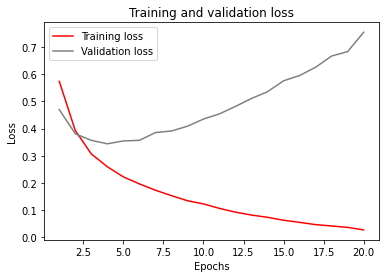

In [6]:
import matplotlib.pyplot as plt
history_diction = history.history
loss_values = history_diction["loss"]
val_loss_values = history_diction["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "grey", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Graphical representation training and validation accuracy

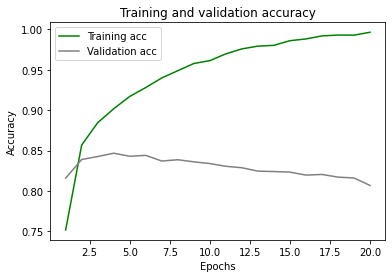

In [7]:
import matplotlib.pyplot as plt
plt.clf()
acc = history_diction["accuracy"]
val_acc = history_diction["val_accuracy"]
plt.plot(epochs, acc, "green", label="Training acc")
plt.plot(epochs, val_acc, "grey", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
model.fit(xtrain1, ytrain1, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2600 - accuracy: 0.9232
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1842 - accuracy: 0.9396
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.1535 - accuracy: 0.9474
Epoch 4/4
49/49 [==============================] - 2s 41ms/step - loss: 0.1282 - accuracy: 0.9595


Checking the output gained : We obtained Loss of 98% and Accuracy of 80%

In [9]:
output = model.evaluate(xtest1, ytest1)

782/782 [==============================] - 2s 3ms/step - loss: 0.5153 - accuracy: 0.8223


Model 2: 3 Hidden layers and 64 Nodes *Compiling, Setting up the sets and training my model*

Compiling the model:

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

max_features = 10000
maxlen = 500
batch_size = 32

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have a fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='tanh', kernel_regularizer='l2'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', loss)
print('Test accuracy:', acc)


Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 0.5371 - acc: 0.7992 - val_loss: 0.4340 - val_acc: 0.8683
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 0.3978 - acc: 0.8863 - val_loss: 0.4472 - val_acc: 0.8636
Epoch 3/10
782/782 [==============================] - 14s 17ms/step - loss: 0.3608 - acc: 0.9066 - val_loss: 0.4583 - val_acc: 0.8650
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3233 - acc: 0.9257 - val_loss: 0.4733 - val_acc: 0.8621
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2840 - acc: 0.9434 - val_loss: 0.4895 - val_acc: 0.8572
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2400 - acc: 0.9619 - val_loss: 0.5095 - val_acc: 0.8677
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2066 - acc: 0.9731 - val_loss: 0.5191 - val_acc: 0.8610
Epoch 8/10
782/782 [==============================] - 14s 17ms

Graphical representation of training and validation loss for the data

---



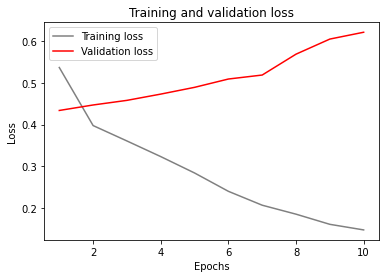

In [14]:
#Plotting the training and validation loss for the data
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Graphical representation of training and validation accuracy for the data

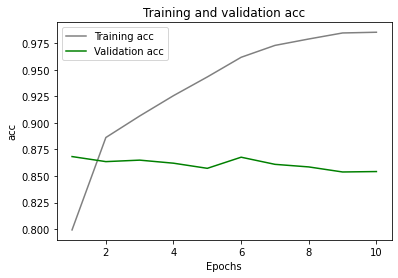

In [15]:
#Graphical represenation of the accuracy obtained 
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'grey', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


Model 3: 1 Hidden Layers and 64 Nodes *Compiling, Setting up the sets and training my model*

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing import sequence

# Set parameters
max_features = 5000
maxlen = 500
batch_size = 32
embedding_dims = 50
epochs = 5

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have a fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Define model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Epoch 1/5
782/782 [==============================] - 39s 49ms/step - loss: 0.4006 - accuracy: 0.8070 - val_loss: 0.2970 - val_accuracy: 0.8723
Epoch 2/5
782/782 [==============================] - 30s 38ms/step - loss: 0.1488 - accuracy: 0.9469 - val_loss: 0.3484 - val_accuracy: 0.8667
Epoch 3/5
782/782 [==============================] - 31s 39ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.4793 - val_accuracy: 0.8596
Epoch 4/5
782/782 [==============================] - 33s 43ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.6453 - val_accuracy: 0.8503
Epoch 5/5
782/782 [==============================] - 32s 40ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.7187 - val_accuracy: 0.8561
Test loss: 0.7187427282333374
Test accuracy: 0.8560799956321716


Graphical representation of the loss

```
# This is formatted as code
```



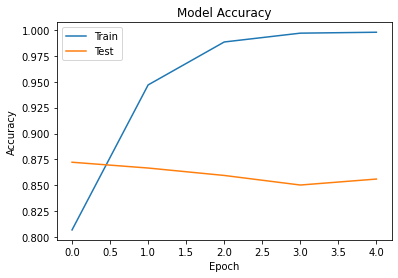

In [19]:
# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



Graphical representation of the loss

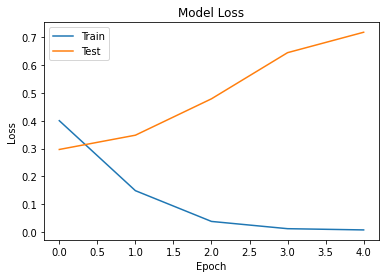

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model 4: 5 Hidden layers and 16 Nodes *Compiling, Setting up the sets and training my model*


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import regularizers

# Set parameters
max_features = 5000
maxlen = 300
batch_size = 64
embedding_dims = 50
epochs = 10

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have a fixed length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build model
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)])



Epoch 1/10
391/391 - 10s - loss: 0.5325 - accuracy: 0.7452 - val_loss: 0.3725 - val_accuracy: 0.8657 - 10s/epoch - 26ms/step
Epoch 2/10
391/391 - 7s - loss: 0.2764 - accuracy: 0.9204 - val_loss: 0.3949 - val_accuracy: 0.8702 - 7s/epoch - 19ms/step
Epoch 3/10
391/391 - 6s - loss: 0.1490 - accuracy: 0.9764 - val_loss: 0.4883 - val_accuracy: 0.8558 - 6s/epoch - 16ms/step


In [27]:
# Evaluate model
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.47619256377220154
Test accuracy: 0.8582000136375427


In [24]:
import matplotlib.pyplot as plt

# Fit model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)])


Epoch 1/10
391/391 - 9s - loss: 0.1474 - accuracy: 0.9729 - val_loss: 0.4762 - val_accuracy: 0.8582 - 9s/epoch - 23ms/step
Epoch 2/10
391/391 - 7s - loss: 0.1046 - accuracy: 0.9888 - val_loss: 0.5538 - val_accuracy: 0.8590 - 7s/epoch - 19ms/step
Epoch 3/10
391/391 - 8s - loss: 0.1008 - accuracy: 0.9890 - val_loss: 0.6043 - val_accuracy: 0.8538 - 8s/epoch - 21ms/step


Graphical representation of the loss

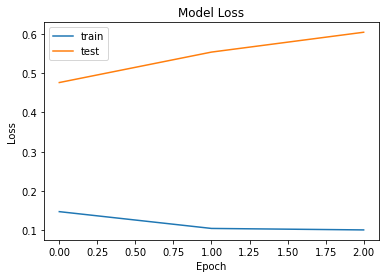

In [25]:
# Plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Graphical representation of the accuracy

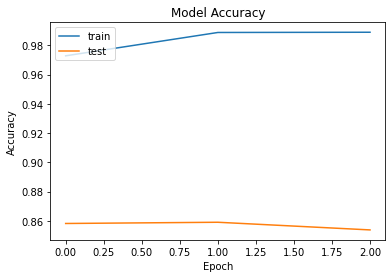

In [26]:
# Plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Generating a depiction of relation between loss percentiles

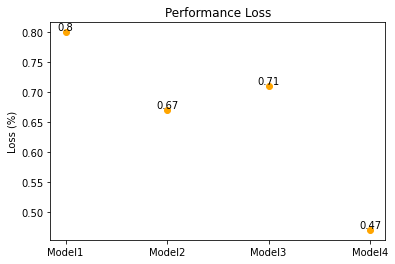

In [33]:
loss_depiction = {'Model1': 0.80, 'Model2': 0.67, 'Model3': 0.71, 'Model4': 0.47, }

models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='orange')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()
     

Generating a depiction of relation between accuracy percentiles

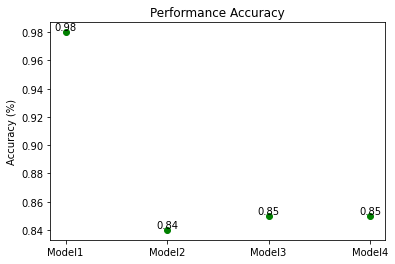

In [32]:
import matplotlib.pyplot as plt

acc_depiction = {'Model1': 0.98, 'Model2': 0.84, 'Model3': 0.85, 'Model4': 0.85,}

nodals = list(acc_depiction.keys())
accuracy = list(acc_depiction.values())

# Plot the scatter plot with labels
plt.scatter(nodals, accuracy, color='green')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(nodals, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()